# Getting Started 
import the basic liberaries used in this project
* Pandas
* Numpy
* seaborn
* Matplotlib 

for this project I have build a python file called `functions` and will use it in `Model Selection` section

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings

warnings.simplefilter('ignore')

In [2]:
# load the datset into data 
data = pd.read_csv('E:/SaMeH/Handsa/Machine Learning Nanodegree/Datasets/Breast_cancer_data.csv')

# drop uncessary columns 
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

#print the number of columns and rows
print("This dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

# change the target to numerical to help us in statistics
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.head()

This dataset contains 569 rows and 31 columns


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Exploration
In this section of this project, I will make a cursory investigation about the dataset and provide some observations. Also I'm gooing to Familiarize myself with the data through an `explorative` process and it is a fundamental process to help us better understand the data and justify the final results. So we are going to walk through the following
* Calculate `Statistics` for numerical features
* Get information about the dataset and its dtypes to detect null values
* Plot Histograms to `Visualize Feature Distributions` in the dataset(Detect Skewness)

### - Calculate Statistics for numerical features

In [16]:
# Calculate Statistics for numerical features
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
Desc.to_excel("E:/SaMeH/Handsa/Machine Learning Nanodegree/Datasets/Desc.xlsx")

##### From the difference between the `median` and `mean` it seems there are some features that have `skewness` that need to be transformed 

### - Get information about the dataset and its dtypes to detect null values

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

##### CONCLUSION: the dataset contains only 1 categorical column and the rest are numericals, also the dataset is clean and have no null values and ready for the preprocessing stage

### - Plot Histograms to Visualize Feature Distributions in the dataset and Detect Skewness 

In [7]:
# Split the dataset to target and features
features = data.drop('diagnosis', axis = 1)
target = data['diagnosis']

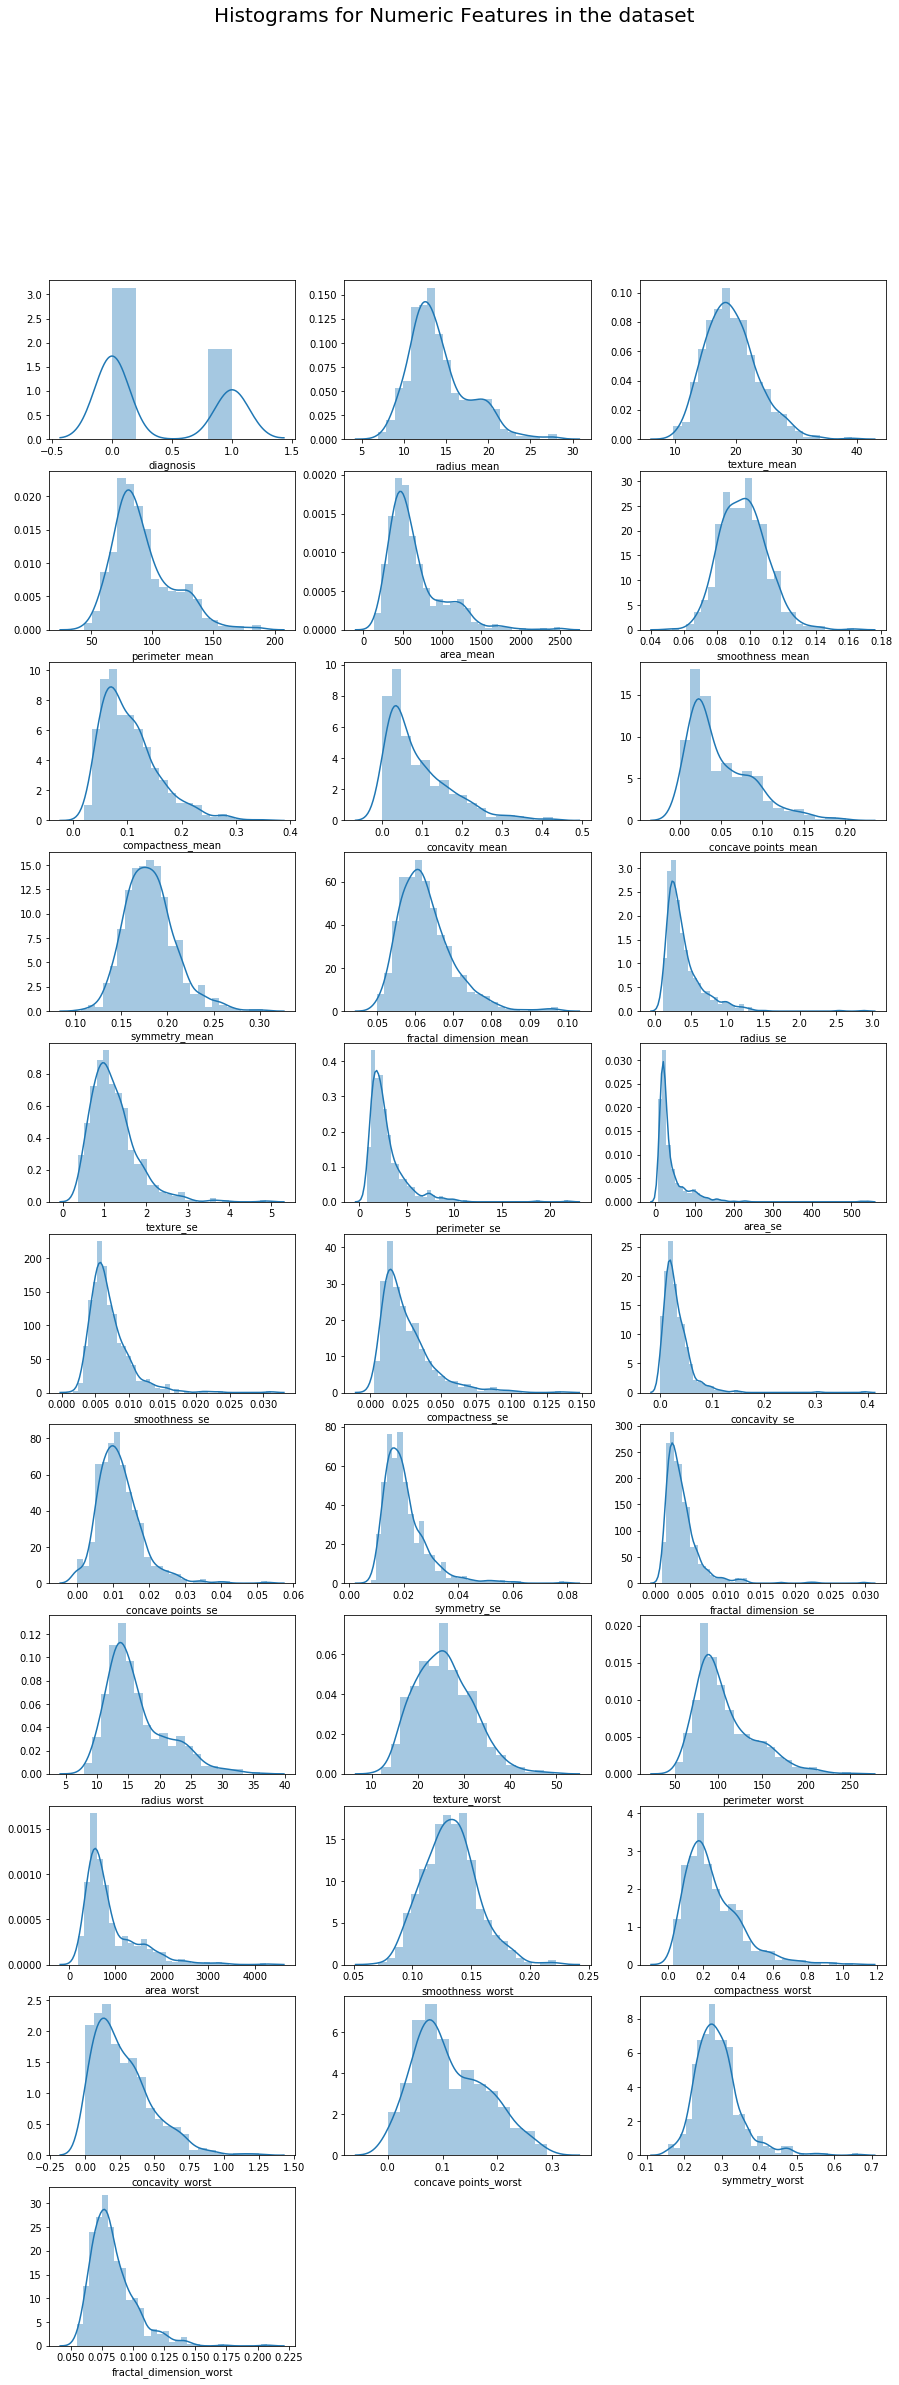

In [84]:
plt.figure(figsize = (15, 38))
plt.suptitle('Histograms for Numeric Features in the dataset', fontsize = 20)
L = list(data)
for i in range(data.shape[1]):
    plt.subplot(11, 3, i + 1)
    sns.distplot(data[L[i]])

##### Calculate the `skewness` of each feature to make sure the features are normally or sub-normally distributed and fix them if not normally distributed

In [8]:
from scipy.stats import skew

features_list = list(features)
Skew_D = {}

# Claculate the skewness of each feature and store them in Skew_D
for f in features_list:
    Skew_D[f] = skew(features[f], bias = False)
    
# Store the features that have high skewned
High_skewed_features = []
for i in Skew_D:
    if (Skew_D[i] > 1) or (Skew_D[i] < -1):
        High_skewed_features.append(i)


##### Plot the features that have high skewness to visualize the skewness using histograms 

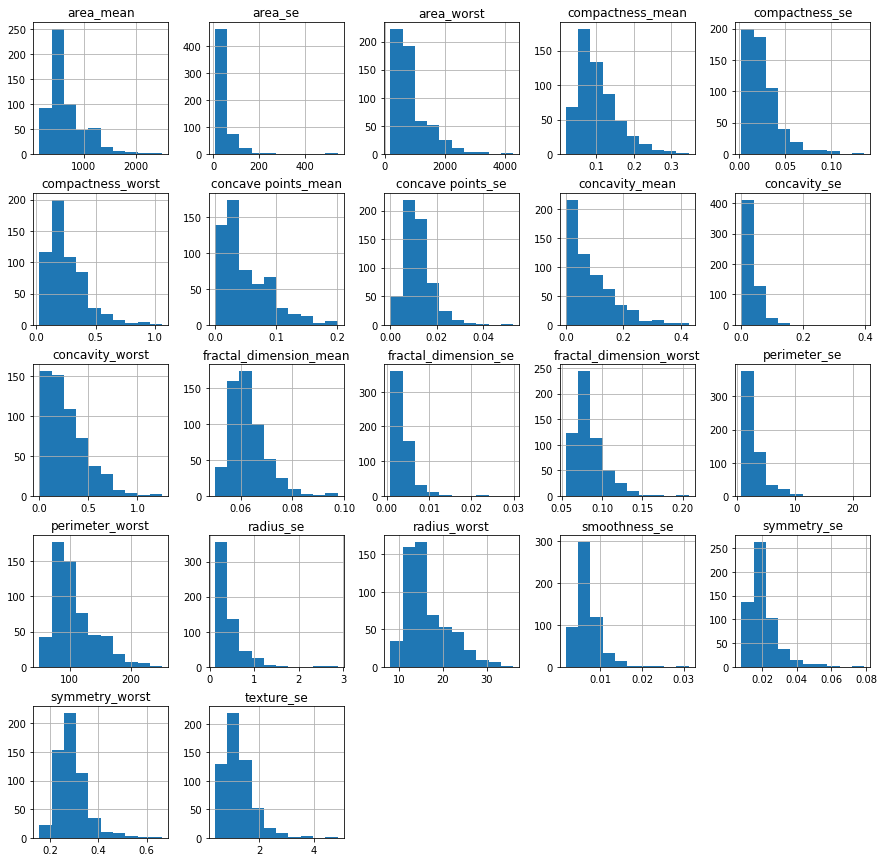

In [132]:
features[High_skewed_features].hist(figsize = (15, 15))
plt.show()

### Apply Logarithm transformation to fix the skewness of the dataset

In [9]:
data_log = data.copy()

for f in High_skewed_features:
    data_log[f] = np.log(data[f] + 1)
    
# this line copies the features to data
features_log = data_log.drop('diagnosis', axis = 1)

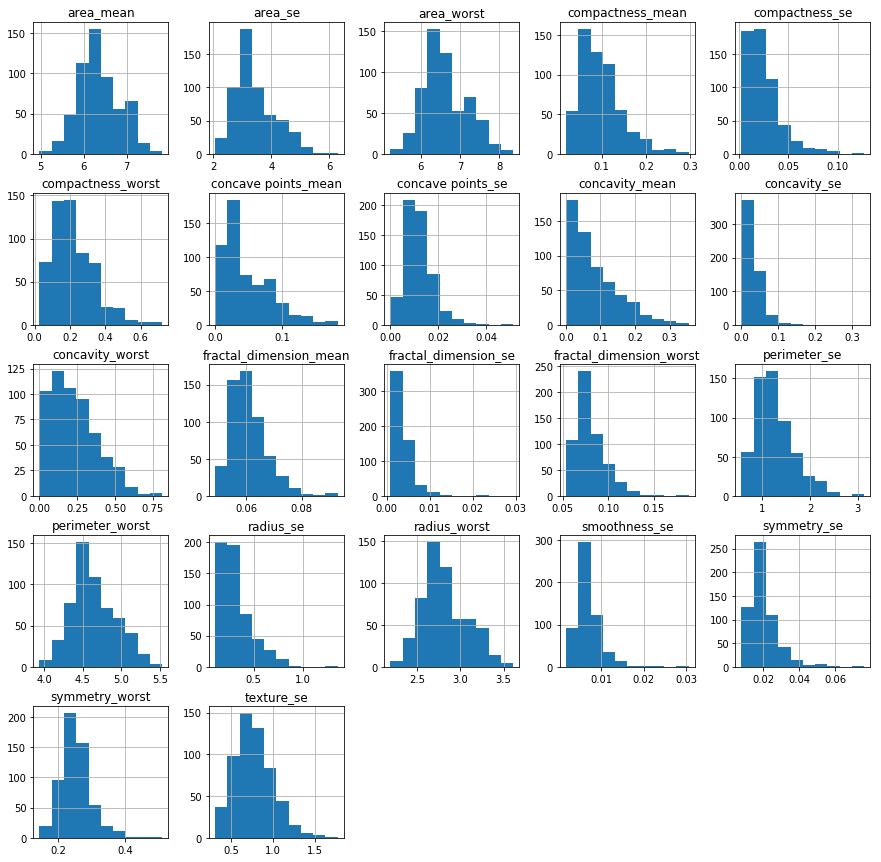

In [149]:
data_log[High_skewed_features].hist(figsize = (15, 15))
plt.show()

#### Here we fixed the skewness after applying the log transformation, and if we calculated the skew function again we would see the difference.

# Correlation Testing
In this section of this project I'm going to find the correlations in the dataset. Because detecting these correlations can help us in `Feature Selection` process in order to minimize the number of features in the dataset.

#### NOTE: I will calculate the correlation between each pair of attributes (correlation matrix). Then I'll plot the correlation matrix to get an idea of which variables have a high correlation with each other.

### Calculate coffecients of corelations between each pair of input features

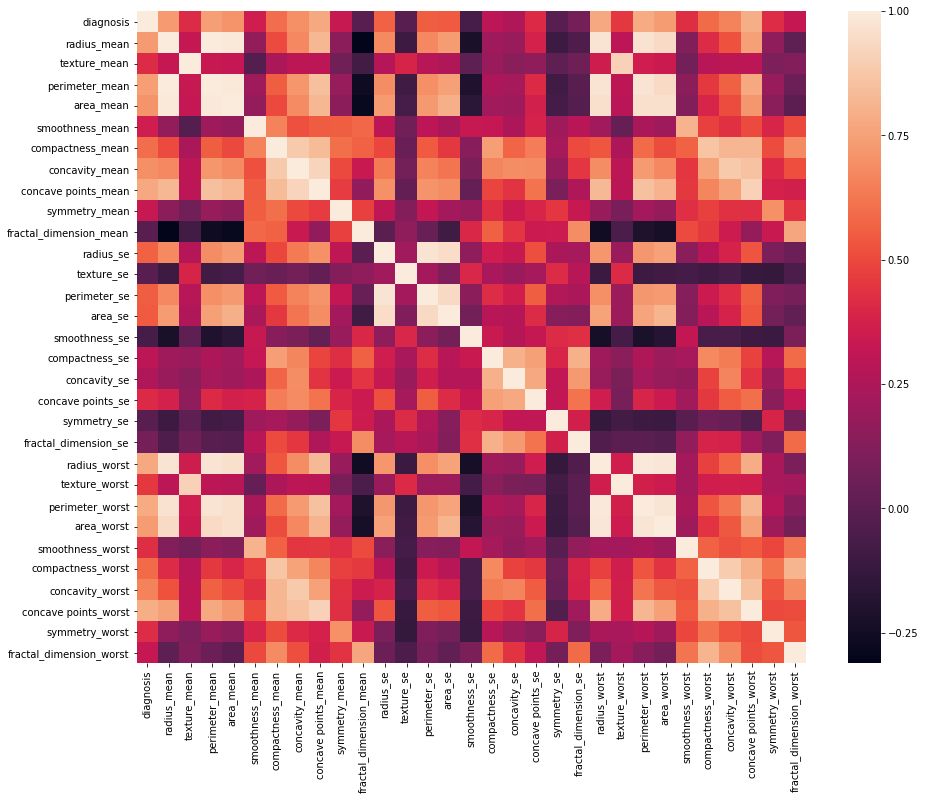

In [10]:
data_corr = data.corr()

plt.figure(figsize = (15, 12))
sns.heatmap(data_corr)
plt.show()

In [19]:
highest_corr = data_corr['diagnosis'].sort_values(ascending = False)[1: 20]
highest_corr

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
texture_worst           0.456903
smoothness_worst        0.421465
symmetry_worst          0.416294
texture_mean            0.415185
Name: diagnosis, dtype: float64

#### Now I'm going to plot barplot (diagnosis VS highest_corr features) to visualize the correlation between the target and the most effective features. 

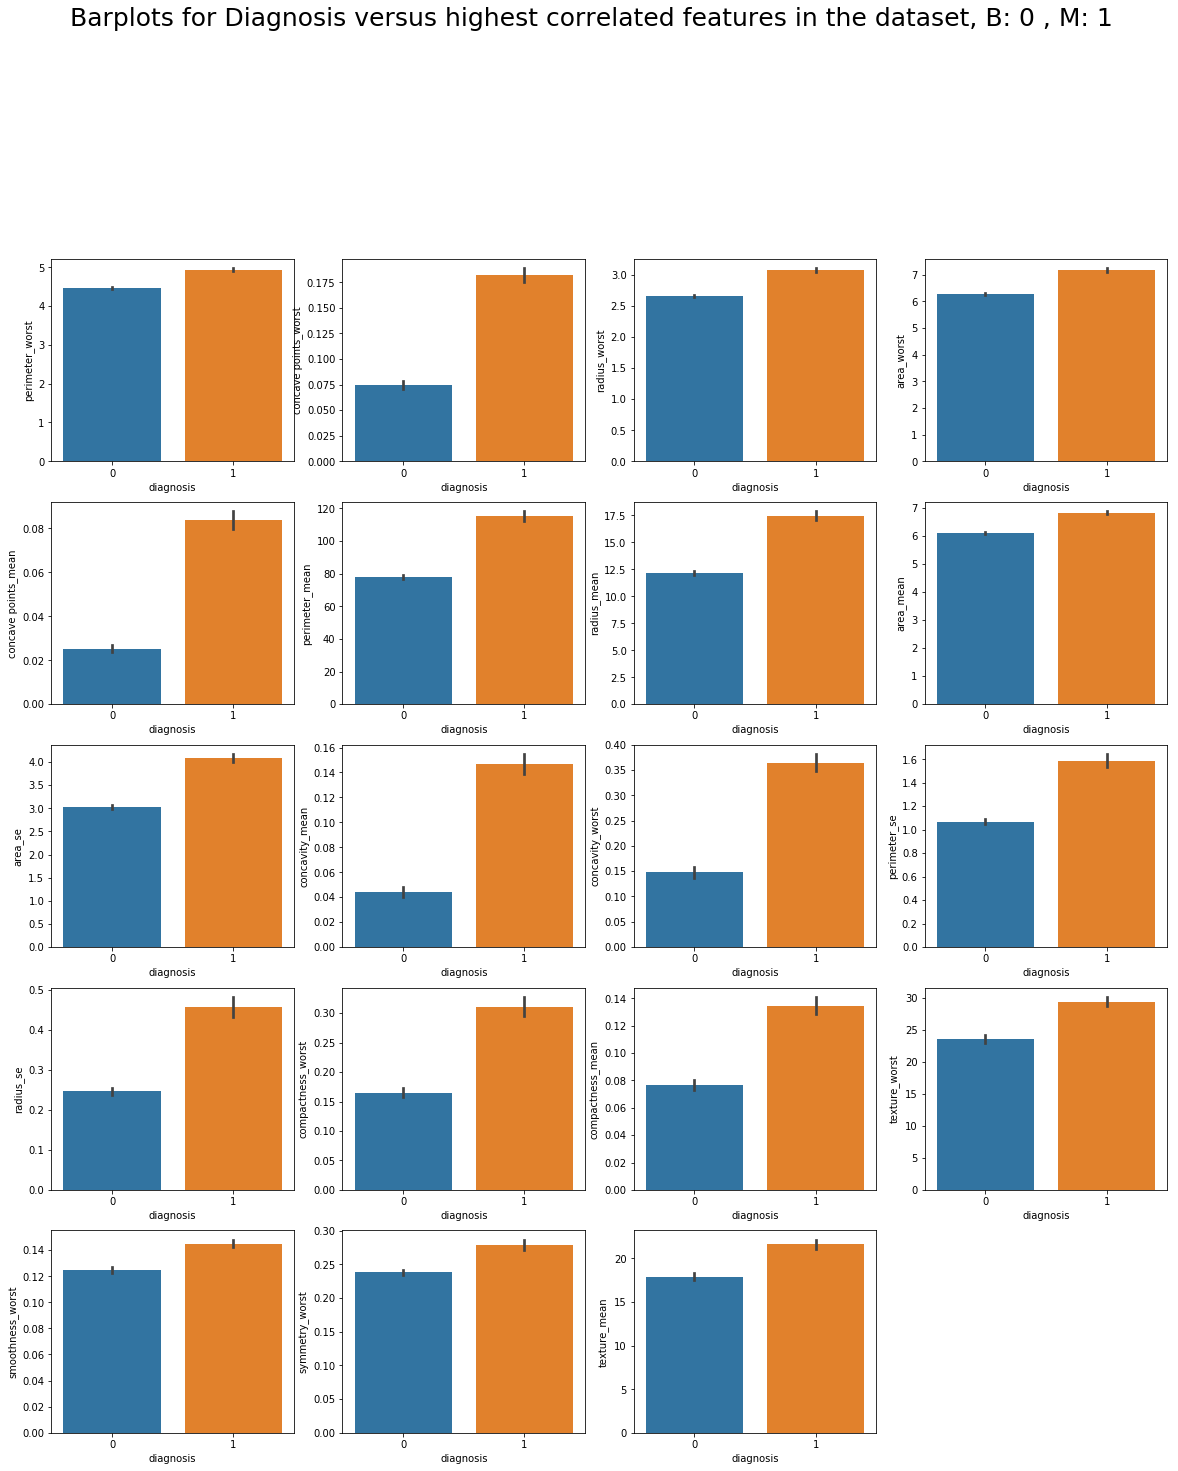

In [137]:
plt.figure(figsize = (20, 35))
plt.suptitle('Barplots for Diagnosis versus highest correlated features in the dataset, B: 0 , M: 1', fontsize = 25)

L = highest_corr.index
for i in range(len(L)):
    plt.subplot(8, 4, i + 1)
    sns.barplot(data = data, x = 'diagnosis', y = L[i])


# Outlier Detection
In this section I'm going to apply some techniques to detect the outliers in the dataset. Outlier can be source of information in the dataset on the other hand it maybe lead to bad results or biased result. So we need to detect them and treat them in the `Preprocessing` stage. 

The presence of outliers can often skew results. There are many techniques for how to detect and deal with the outliers in a dataset. *outlier step* is calculated as `factor` multiplied the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [20]:
# hold all indices of outliers
outliers_index = set()

# factor for calculating the step
factor = 4.5


for f in list(features): 
    Q1 = np.percentile(data[f], q = 25)
    Q3 = np.percentile(data[f], q = 75)
    step = (Q3 - Q1) * factor
    
    for i in range(len(data)):
        if (data[f].loc[i] > (Q3 + step)) | (data[f].loc[i] < (Q1 - step)):
            outliers_index.add(i)
            
print("There {} detected outliers".format(len(outliers_index)))

There 21 detected outliers


### Delete the outliers

In [21]:
data_log.drop(list(outliers_index), axis = 0, inplace = True)

print("The number of rows after deleting outliers is: {}".format(len(data_log)))

The number of rows after deleting outliers is: 548


# Data Preprocessing
#### In this section of this project I'm going to apply:
* Apply `Feature Scaling` (Transformation)
* Split the dataset into `Trainset` and `Testset`

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# prepare the final data for the model
final_features = scaler.fit_transform(features_log)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, 
                                                    shuffle = True, random_state = 0)

print("training set size: {}, testing set size: {}".format(len(X_train), len(X_test)))

training set size: 455, testing set size: 114


# Model Selection
#### In this Process I'm going to apply the following:
* Pick up the most `appropriate models` that best-fit the problem I'm trying to solve.
* Define the required metrics that need to evaluate the model performance.
* Filter these models by testing them by ploting `learing curve` for each one.

In this section I planned to list some of the best Machine Learning Classifiers and see which ones are appropriate for this problem, and after that I will filter these models to pick the best one that give me the best accuracy.
##### These models are:
1. Support Vector Machine (SVM)
2. Logistic Regression
3. Random Forest Classifier
4. Multi-Layer Perceptron (MLP)

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

# Build these models
svc_model = SVC(random_state= 40) 
logistic_model = LogisticRegression(random_state= 40)
random_model = RandomForestClassifier(random_state= 40)
mlp_model = MLPClassifier(random_state= 40)


### Now I'm going to plot `learning curves` and apply `Cross Validation` to help me filter these models and pick the most appropriate one.
learning curve give initial intution about which model will overfit and which will underfit and which one will do good job.

### Note:
for the purpose of simplicity I have built a function in `functions` file to impllement multiple cross validations for multiple models, this function called `multi_cross_val`

Precentage of work done: 25.0%
Precentage of work done: 50.0%
Precentage of work done: 75.0%
Precentage of work done: 100.0%


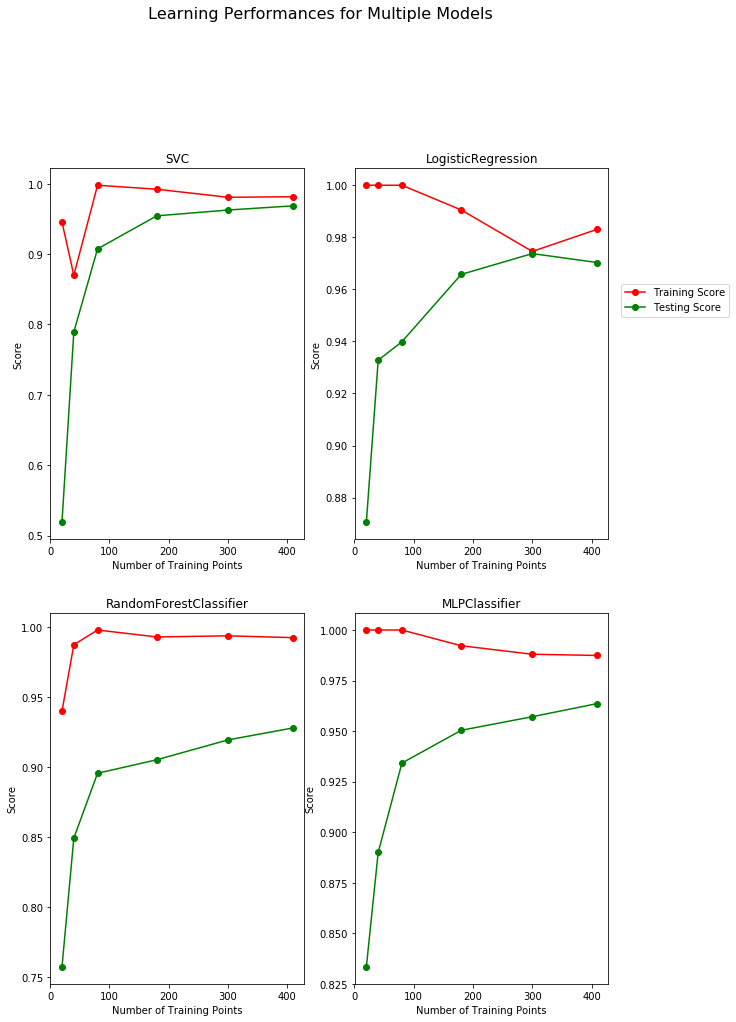

In [25]:
from functions import plot_learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, f1_score


cv= KFold(n_splits = 10, shuffle = True, random_state = 0) 
train_sizes= [20, 40, 80, 180, 300, 409]
scorer= make_scorer(f1_score)

plot_learning_curve([svc_model, logistic_model, random_model, mlp_model], X_train, y_train, train_sizes, scorer, cv)

In [26]:
from functions import multi_cross_val

# apply cross_val_score for SVC and MLPClassifier
scores = multi_cross_val([svc_model, logistic_model, random_model, mlp_model], X_train, y_train, cv, scorer)

#get the average of the scores
scores = np.mean(scores, axis = 1)

print("The average scores for SVC is: {} and for LogisticRegression is: {}".format(scores[0], scores[1]))
print("The average score for RandomForest is: {} and for MLPClassifier is: {}".format(scores[2], scores[3]))

The average scores for SVC is: 0.9685693138279344 and for LogisticRegression is: 0.9703168110320062
The average score for RandomForest is: 0.9280011816445703 and for MLPClassifier is: 0.9631691968738249


From the above learning curves and Cross Validation I will pick `SVC` and `LogisticRegression` because they both gives high accuracy in learning curves and Cross Validation.
So I'm going to take these two models and filter them later in the project.

# Fine Tune the Model
In this sectoin of this project I'm going to fine tune the model's hyperparameters using `Grid Search` Technique in order to improve the performance of the model.
For this purpose I have built a method called `multi_grid_search` in functions file in order to apply GrideSearchCV for multiple models to apply it for the filtered models.

In [43]:
from functions import multi_grid_search

#prepare svc's paramters
svc_params = {'C': [1, 2, 2.5, 3], 'kernel': ['linear', 'poly', 'rbf']}

#prepare mlp's prarmeters
logistic_params = {'penalty': ['l1','l2'], 'C': [0.09, 0.1, 0.5, 1, 2], 'max_iter': [75, 100, 200, 500]}

#apply GrideSearchCv for both models
grids = multi_grid_search([svc_model, logistic_model], X_train, y_train, [svc_params, logistic_params], cv, scorer)

C:\Users\ALKODS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Precentage of work done: 50.0%
Precentage of work done: 100.0%


In [40]:
# get the best svc
best_svc = grids[0].best_estimator_

# get the best mlp 
best_logistic = grids[1].best_estimator_

# Model Evaluation
In this section of the project I'm going to measure the performance of the final model(s) to make sure the final one can go to the light.

In this section I'm going to implement the following:
* Implement cross validation and test the models on the testset in order to pick the best one of them.
* Plot confusion Matrix to detect `false positive` and `false_negative`

In [45]:
from functions import multi_cross_val

# apply cross_val_score for SVC and MLPClassifier
scores = multi_cross_val([best_svc, best_logistic], X_train, y_train, cv, scorer)

#get the average of the scores
scores = np.mean(scores, axis = 1)

print("The average score for SVC is: {} and for LogisticRegression is: {}".format(scores[0], scores[1]))

The average score for SVC is: 0.9756883349625284 and for LogisticRegression is: 0.9717376650844394


Till here the two models perform almost the same so testing them on the testset will differentiate between them.

In [46]:
# predict on testset 
svc_pred = best_svc.predict(X_test)
logistic_pred = best_logistic.predict(X_test)

#calculate f1_score for both predictions to decide the winner
svc_score = f1_score(y_test, svc_pred)
logistic_score = f1_score(y_test, logistic_pred)

print("The test score for SVC is: {} and for MLP is: {}".format(svc_score, logistic_score))

The test score for SVC is: 0.989247311827957 and for MLP is: 0.9375000000000001


#### It's clear now that  `SVC`  is the best classifier because it is the best  model which has the highest performance on both trainset and testset. So now I'll consider the final model is SVC 

Now I'm going to try eliminate the less important featreus and keep the highest coorelated ones, trying to simplify the model. This setp will lead to less acurate model but if we came to trade-off between accuracy and speed of the model we may choose to reduce the number of features. So i'll give it a try.

## Refine the model input features
In this section I will remove the least important features trying to speed-up the model perormance, this setp might seems not necessary in my case because I have a small dataset. But I'll do in the seek of figure out what would be the result.

In [42]:
scaler = StandardScaler()

# prepare the final data for the model
final_features_reduced = scaler.fit_transform(features_log[highest_corr.index])


X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(final_features_reduced,
                                                                                    target, test_size = 0.2, 
                                                                                    shuffle = True, random_state = 0)

best_svc.fit(X_train_reduced, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=40,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
# apply cross_val_score for SVC and MLPClassifier
scores = multi_cross_val([best_svc], X_train_reduced, y_train, cv, scorer)

#get the average of the scores
scores = np.mean(scores, axis = 1)

print("The average score for SVC is: {} ".format(scores[0]))

The average score for SVC is: 0.9722609156076899 


In [44]:
# predict on testset 
svc_pred_reduced = best_svc.predict(X_test_reduced)

#calculate f1_score for both predictions to decide the winner
svc_score = f1_score(y_test, svc_pred_reduced)

print("The test score for SVC is: {} ".format(svc_score))

The test score for SVC is: 0.9787234042553191 


### That's Good! 
As we see after removing the less important features the model's accuracy still the same on trainset, but its accuracy decreased a little (1%) on testset. 
This trade-off in this size of the dataset not important because we have small dataset, but if we increased the number of rows to be high (like 20,000 - 50,000) we may prefere to eliminate these less important features
---

# Accuracy Visualization
### Final Step
In this final step I'm going to calculate the `confusion matrix` in order to detect the two types of errors `False Positive` and `False Negative`. 
For sure we care much about `False Negatives` because it's more risky as it sends the patient to home pretending he/she is safe and don't suffer anything, and because of this this type of error more risky so we wish to cut it out.
For the purpose of organization and simplicity I have built external function in `functions` file to calculate the confusion matrix entities.

In [50]:
from functions import cal_confusion_matrix

# apply first on trainset
elements, train_confusion = cal_confusion_matrix(y_train, best_svc.predict(X_train))

# apply first on trainset
elements, test_confusion = cal_confusion_matrix(y_test, best_svc.predict(X_test))


#### Plot the confution Matrix for trainset and testset using seaborn

In [51]:
#Build dataframe for train_confusion
confusion_train = pd.DataFrame(index = ['Predict Positive', 'Predict Negative'], 
                          columns = ['Actual Positive', 'Actual Negative'])

#Assign values for corresponding rows and columns
confusion_train['Actual Positive'] = train_confusion[0], train_confusion[2]
confusion_train['Actual Negative'] = train_confusion[1], train_confusion[3]

#Build dataframe for test_confusion
confusion_test = pd.DataFrame(index = ['Predict Positive', 'Predict Negative'], 
                          columns = ['Actual Positive', 'Actual Negative'])

#Assign values for corresponding rows and columns
confusion_test['Actual Positive'] = test_confusion[0], test_confusion[2]
confusion_test['Actual Negative'] = test_confusion[1], test_confusion[3]

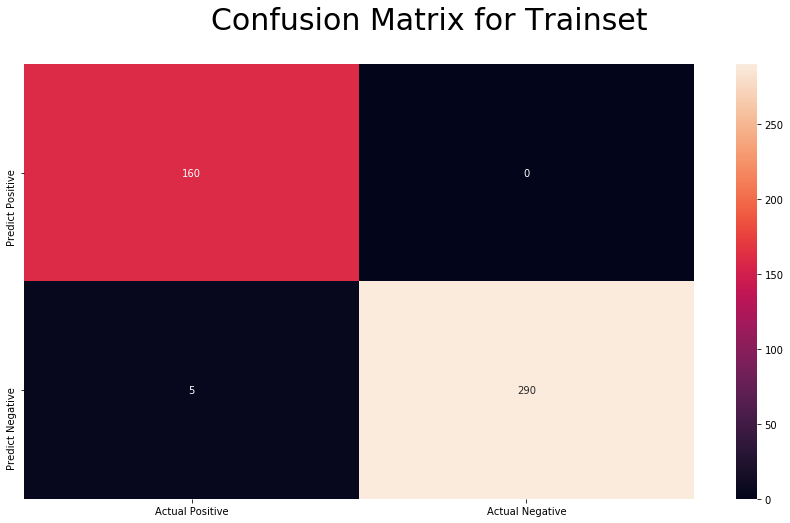

In [52]:
#plot confusion for trainset
plt.figure(figsize = (15, 8))
plt.suptitle("Confusion Matrix for Trainset", fontsize = 30)
sns.heatmap(confusion_train, annot = True, fmt = 'd')
plt.show()

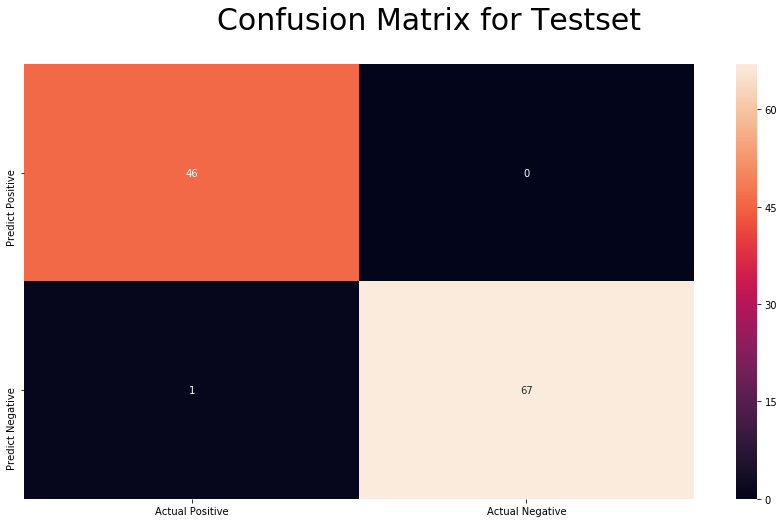

In [68]:
#plot confusion for trainset
plt.figure(figsize = (15, 8))
plt.suptitle("Confusion Matrix for Testset", fontsize = 30)
sns.heatmap(confusion_test, annot = True, fmt = 'd')
plt.show()

## Conclusion
##### The total `False Postives` for trainset and testset is `6`  and got zero `False Negatives` so that's great result.
---